In [ ]:
# KNeighborsClassifier, accuracy_score, confusion_matrix, MLPClassifier

# https://www.youtube.com/watch?v=d1SVWEDxMUo

In [1]:
import pandas as pd

In [4]:
mnist_train = pd.read_csv("mnist_train.csv", header = None)

In [8]:
cols = ["label"]
for i in range(784):
    cols.append(f"px_{i}")
mnist_train.columns = cols
# можно поставить cols.append("px_" + str(i))

In [18]:
mnist_train.shape

(60000, 785)

In [31]:
digit = mnist_train.values[1,1:].reshape(28,28)

In [32]:
digit.shape

(28, 28)

In [33]:
import matplotlib.pyplot as plt

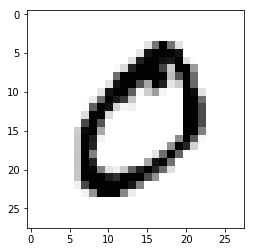

In [34]:
plt.imshow(digit, cmap = "Greys")

In [30]:
import sys
sys.version

'3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]'

# https://www.youtube.com/watch?v=8-sVMDYsevo

In [44]:
mnist_train1 = pd.read_csv("mnist_train.csv", header = None)
mnist_test1 = pd.read_csv("mnist_test.csv", header = None)

In [45]:
cols = ["label"]
for i in range(784):
    cols.append("px_" + str(i + 1))

In [46]:
mnist_train1.columns = cols
mnist_test1.columns = cols

In [70]:
train_images = mnist_train1.values[:,1:].reshape(60000, 28, 28)
test_images = mnist_test1.values[:,1:].reshape(10000, 28, 28)

In [71]:
train_images.shape
test_images.shape

(10000, 28, 28)

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn_classifier = KNeighborsClassifier(n_jobs = -1)

### knn_classifier = KNeighborsClassifier(n_neighbors =  ???, n_jobs = -1)
#### Параметр n_neighbors указывает, сколько соседних значений рассматривает классификатор. Влияет на производительность и точность вычислений

In [79]:
knn_classifier = knn_classifier.fit(train_images.reshape(60000,784), mnist_train1["label"])

In [93]:
image_id = 1230

In [94]:
prediction = knn_classifier.predict(test_images[image_id].reshape(1,784))

In [95]:
prediction

array([4], dtype=int64)

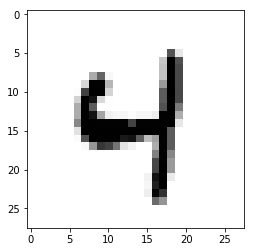

In [96]:
plt.imshow(test_images[image_id], cmap = "Greys")

In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [99]:
all_predictions = knn_classifier.predict(test_images.reshape(10000, 784))

In [100]:
accuracy_score(mnist_test1["label"], all_predictions)

0.9688

In [104]:
cm = confusion_matrix(mnist_test1["label"], all_predictions)
cm

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]],
      dtype=int64)

prediction:2


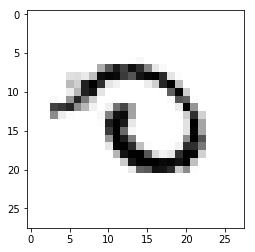

prediction:7


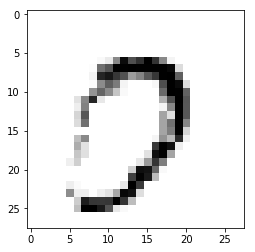

prediction:5


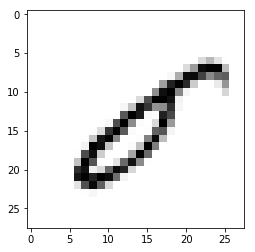

prediction:6


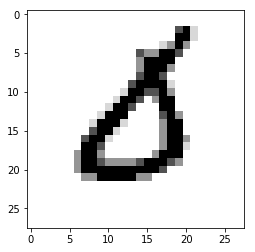

prediction:1


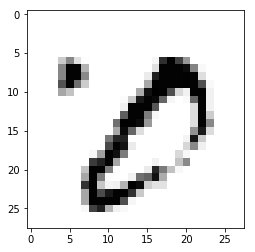

prediction:6


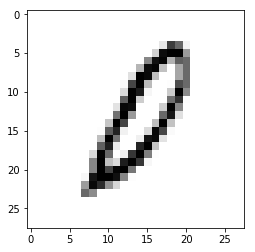

In [119]:
for i, (real, pred) in enumerate(zip(mnist_test1["label"], all_predictions)):
    if real == 0 and real != pred:
        print("prediction:" + str(all_predictions[i]))
        plt.imshow(test_images[i], cmap = "Greys")
        plt.show()

In [116]:
all_predictions.size

10000

### Нейронная сеть
### входные сигналы: bias, x1, x2, x3 ... x784
### второй слой:     a0,   a1, a2, a3 ... a784
### X = a1 * x1 + a2 * x2 + ... + a784 * x 784 + a0 * bias
### f(X) -> Y (ХЗ, что значит)

In [120]:
from sklearn.neural_network import MLPClassifier

In [121]:
nn_classifier = MLPClassifier(verbose = True)
# параметр verbose - echo работы нейросети

In [ ]:
nn_classifier = nn_classifier.fit(train_images.reshape(60000, 784), mnist_train1["label"])

In [123]:
image_id = 23

In [124]:
prediction = nn_classifier.predict(test_images[image_id].reshape(1, 784))
prediction

array([5], dtype=int64)

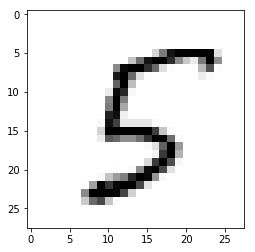

In [125]:
plt.imshow(test_images[image_id], cmap = "Greys")

In [127]:
all_predictions = nn_classifier.predict(test_images.reshape(10000, 784))
accuracy_score(mnist_test1["label"], all_predictions)

0.9464

In [132]:
cm = confusion_matrix(mnist_test1["label"], all_predictions)
cm

array([[ 942,    1,    5,    0,    1,    6,    4,    7,    9,    5],
       [   0, 1102,    7,    4,    0,    0,    2,    0,   19,    1],
       [   5,    3,  966,   16,    6,    1,    3,   13,   19,    0],
       [   0,    1,   13,  953,    1,   19,    0,    6,    9,    8],
       [   1,    0,    5,    2,  946,    0,   10,    3,    5,   10],
       [   0,    0,    2,   28,    2,  828,   15,    1,   11,    5],
       [  10,    1,    3,    2,   11,    3,  918,    0,    9,    1],
       [   0,    1,    8,    9,   10,    4,    0,  977,    8,   11],
       [   1,    1,    4,   16,    6,   12,    1,   10,  920,    3],
       [   5,    1,    2,   13,   47,    3,    1,   12,   13,  912]],
      dtype=int64)

### У объекта MLPClassifier параметры hidden_layer_sizes и activation могут повлиять на точность нейронной сети